In [2]:
import pandas as pd

# Загрузка данных
userdata = pd.read_csv('/Users/timofey/repos/Dataton_Project/userdata.csv')
orderdata = pd.read_csv('/Users/timofey/repos/Dataton_Project/orderdata.csv')
interactiondata = pd.read_csv('/Users/timofey/repos/Dataton_Project/interactiondata.csv')
pd.set_option('display.max_columns', None)

# Первоначальный осмотр данных
print(userdata.head())
print("---")
print(orderdata.head())
print("---")
print(interactiondata.head())

                                 userid        join_datetime  age    income  \
0  dc9d5bd4-ec88-4546-b46c-fe9d6eaba691  2023-09-11 21:09:07   70  115443.0   
1  35821e5c-cc2a-425c-a270-5377de69177c  2023-12-25 14:09:54   71  107793.0   
2  d4810416-7e2a-4d1b-8440-30f39cd42aca  2022-11-14 12:31:05   13   25508.0   
3  b56b1df3-8a67-4d61-82cf-dd9ed659bd63  2023-12-07 01:57:02   20   81139.0   
4  06583f0c-f0b2-4f50-add5-5f16238b33bb  2022-08-22 00:24:55   16   26121.0   

   kids  teenagers   marital education  
0     0          0  divorced  bachelor  
1     0          1   married   masters  
2     0          0    single       NaN  
3     0          0    single  bachelor  
4     0          0    single   masters  
---
                                 userId category  avg_bill
0  2c6336a2-852b-48af-9150-9b9030387f5d     fish     432.0
1  1085e67c-3c4e-4903-b3e9-16631132c655    other     620.0
2  99792dfd-8c62-4903-92b2-a83dfd392cb1   sweets     233.0
3  ad50b3da-da8d-4b35-92c3-79cf83c2250a

In [3]:
interactiondata.describe()

,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
count,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000
mean,0.579736,3.810866,2.064023,4.537739,3.281057,5.902203,11.004405,27.441703,0.216740,0.188253,0.230543,0.214097,0.224670
std,0.825134,5.197684,2.672049,3.327696,2.876013,3.705144,12.015278,26.555485,0.412085,0.390971,0.421242,0.410255,0.417426
min,0.000000,0.000000,-1.000000,0.000000,-3.000000,0.000000,-2.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,4.000000,2.000000,6.000000,8.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,4.000000,6.000000,5.000000,8.000000,16.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,29.000000,28.000000,13.000000,27.000000,20.000000,59.000000,119.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# чистка данных orderdata
orderdata['avg_bill'] = orderdata['avg_bill'].dropna()
orderdata = orderdata[orderdata['category']!='alcohol']
orderdata = orderdata[orderdata['avg_bill']>0]
# чистка данных userdata

# чистка данных interactiondata
interactiondata = interactiondata[(interactiondata['catalogue_purchases_count_avg']>=0) & (interactiondata['website_purchases_count_avg']>=0) & (interactiondata['mobile_purchases_count_avg']>=0) & (interactiondata['mobile_visit_count_avg']>=0)]

In [5]:
# Проверка пропусков в данных
print(userdata.isnull().sum())
print(orderdata.isnull().sum())
print(interactiondata.isnull().sum())
print("---")
# Проверка статистических данных для выявления аномалий
print(userdata.describe())
print(orderdata.describe())
print(interactiondata.describe())


userid             0
join_datetime      0
age                0
income             0
kids               0
teenagers          0
marital            0
education        296
dtype: int64
userId      0
category    0
avg_bill    0
dtype: int64
UserId                            0
complain_count                    0
last_order_dt                    59
discount_purchases_count_avg      0
catalogue_purchases_count_avg     0
store_purchases_count_avg         0
website_purchases_count_avg       0
website_visit_count_avg           0
mobile_purchases_count_avg        0
mobile_visit_count_avg            0
marketing_company_outcome_1       0
marketing_company_outcome_2       0
marketing_company_outcome_3       0
marketing_company_outcome_4       0
marketing_company_outcome_5       0
dtype: int64
---
               age         income         kids    teenagers
count  3405.000000    3405.000000  3405.000000  3405.000000
mean     38.973275   65902.699266     0.291336     0.328047
std      19.069070   32120.

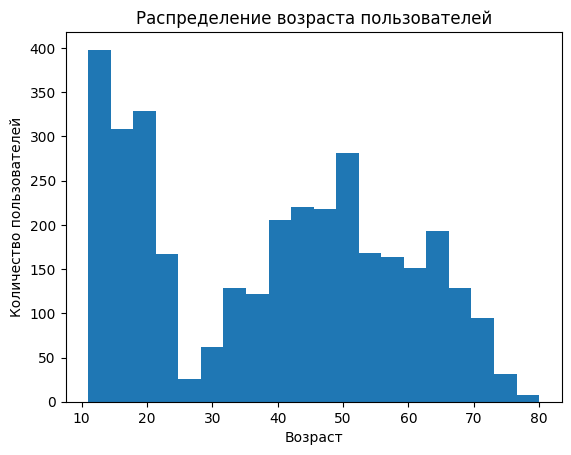

In [6]:
import matplotlib.pyplot as plt

plt.hist(userdata['age'], bins=20)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()
   


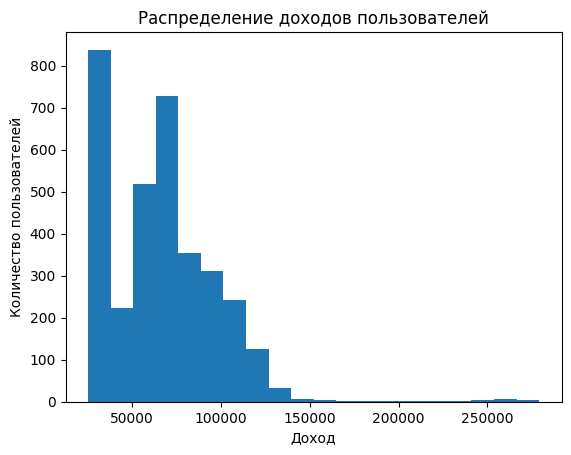

In [7]:
plt.hist(userdata['income'], bins=20)
plt.title('Распределение доходов пользователей')
plt.xlabel('Доход')
plt.ylabel('Количество пользователей')
plt.show()
   

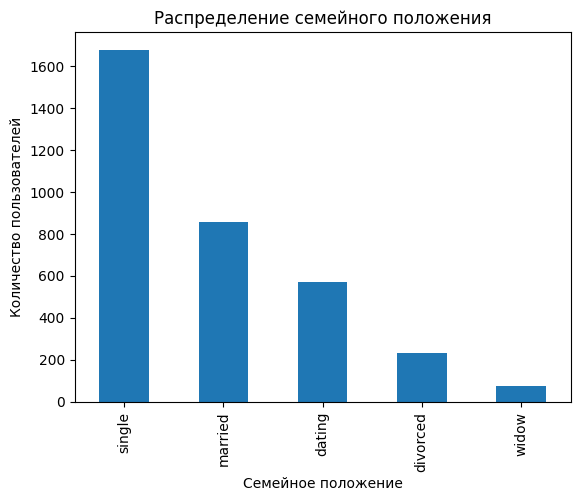

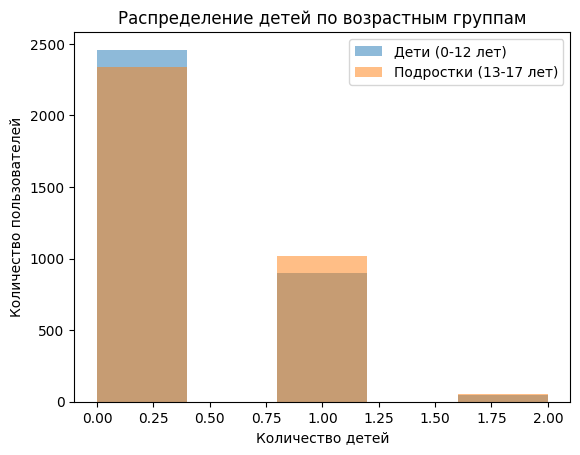

In [8]:
marital_counts = userdata['marital'].value_counts()
marital_counts.plot(kind='bar')
plt.title('Распределение семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('Количество пользователей')
plt.show()

# Наличие детей
plt.hist(userdata['kids'], bins=5, alpha=0.5, label='Дети (0-12 лет)')
plt.hist(userdata['teenagers'], bins=5, alpha=0.5, label='Подростки (13-17 лет)')
plt.legend(loc='upper right')
plt.title('Распределение детей по возрастным группам')
plt.xlabel('Количество детей')
plt.ylabel('Количество пользователей')
plt.show()
   

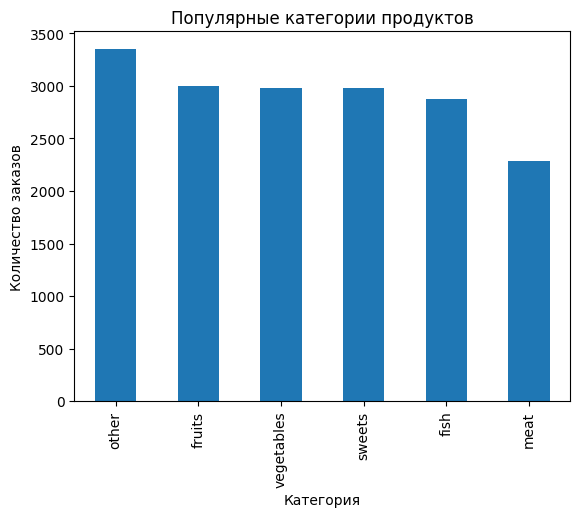

In [9]:
category_counts = orderdata['category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Популярные категории продуктов')
plt.xlabel('Категория')
plt.ylabel('Количество заказов')
plt.show()
   

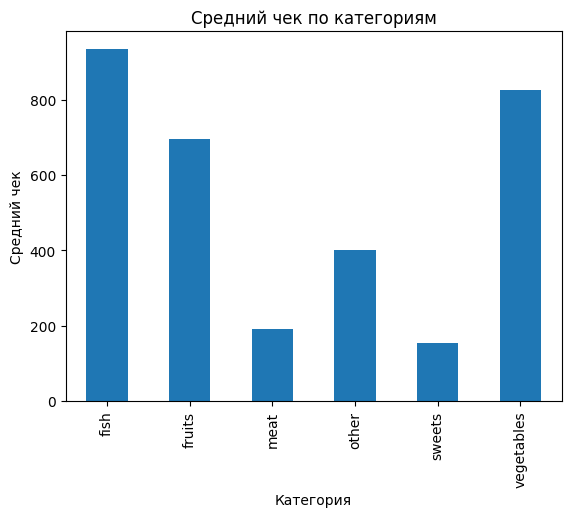

In [10]:
avg_bill_by_category = orderdata.groupby('category')['avg_bill'].mean()
avg_bill_by_category.plot(kind='bar')
plt.title('Средний чек по категориям')
plt.xlabel('Категория')
plt.ylabel('Средний чек')
plt.show()
   

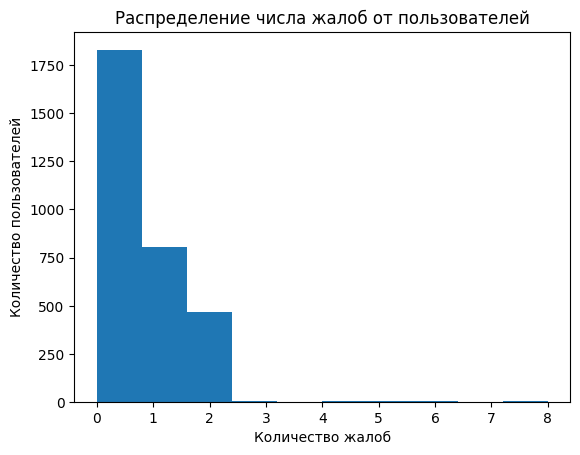

In [11]:
plt.hist(interactiondata['complain_count'], bins=10)
plt.title('Распределение числа жалоб от пользователей')
plt.xlabel('Количество жалоб')
plt.ylabel('Количество пользователей')
plt.show()


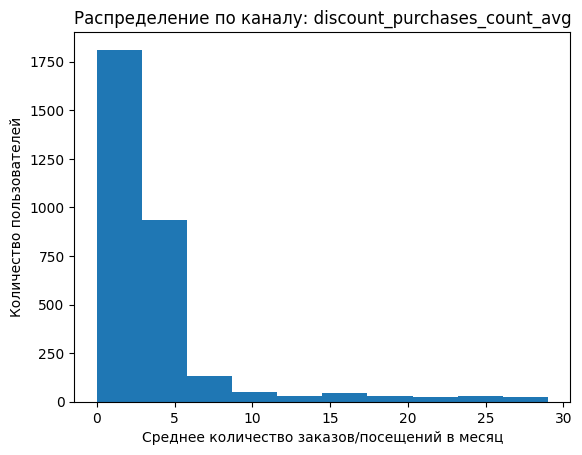

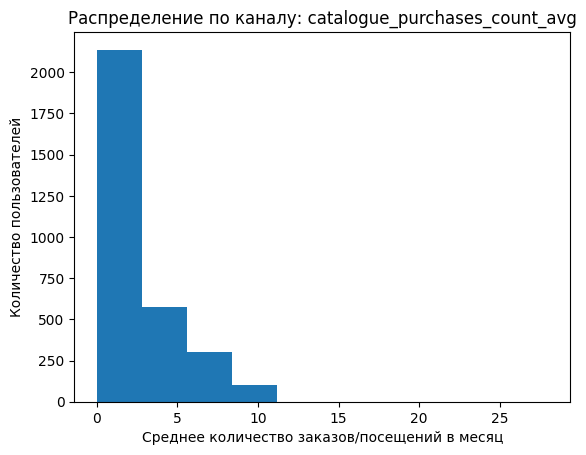

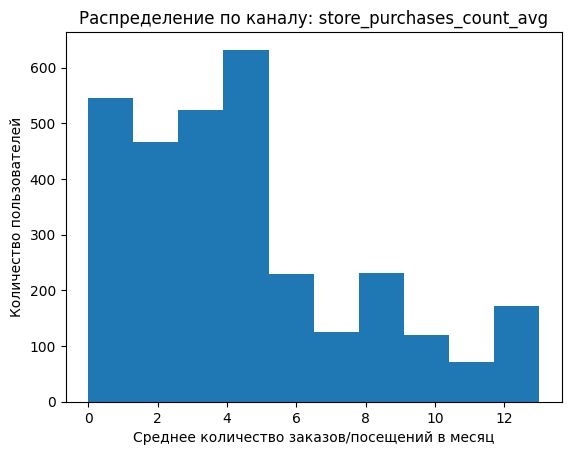

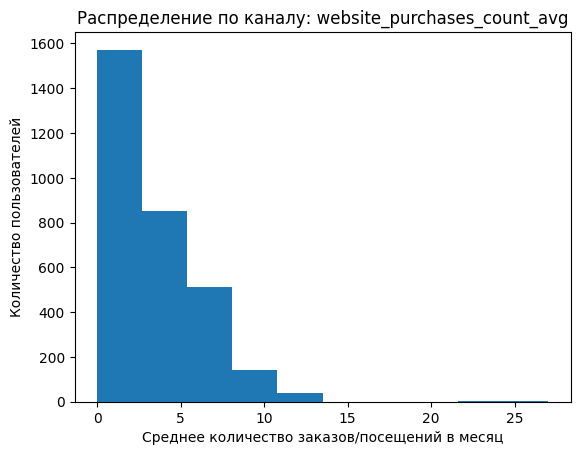

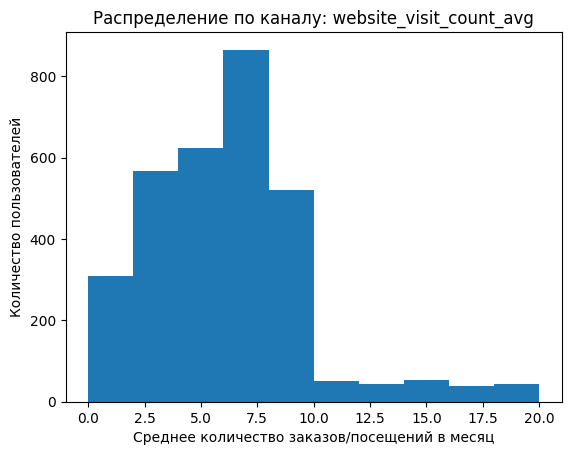

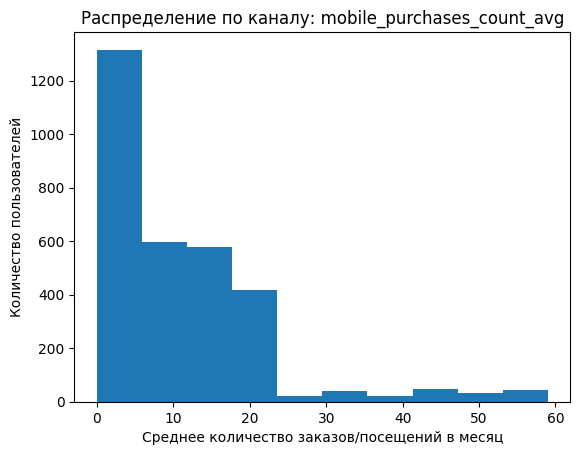

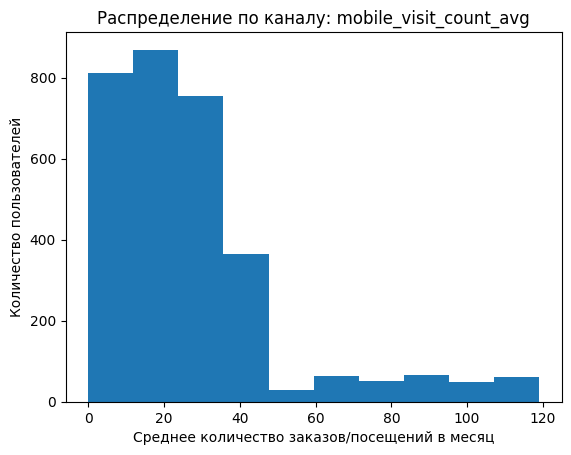

In [12]:
channels = ['discount_purchases_count_avg', 'catalogue_purchases_count_avg', 'store_purchases_count_avg',
            'website_purchases_count_avg', 'website_visit_count_avg', 'mobile_purchases_count_avg', 'mobile_visit_count_avg']

for channel in channels:
    plt.hist(interactiondata[channel], bins=10)
    plt.title(f'Распределение по каналу: {channel}')
    plt.xlabel('Среднее количество заказов/посещений в месяц')
    plt.ylabel('Количество пользователей')
    plt.show()
   

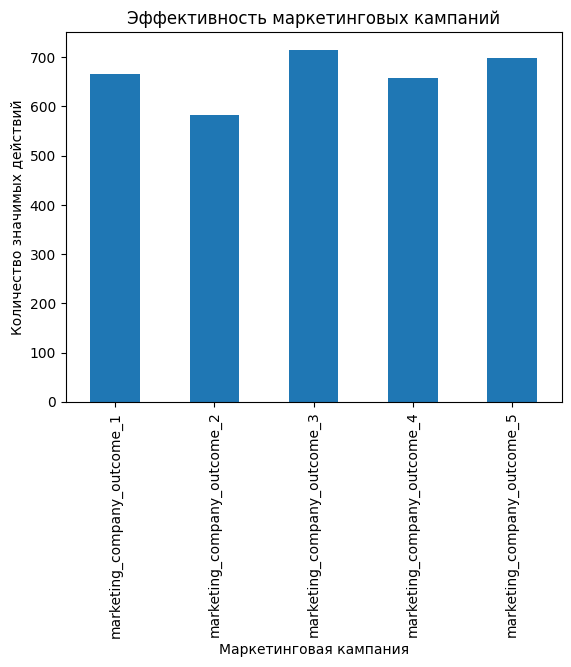

In [13]:
marketing_columns = [col for col in interactiondata.columns if col.startswith('marketing_company_outcome')]
marketing_outcomes = interactiondata[marketing_columns].sum()

marketing_outcomes.plot(kind='bar')
plt.title('Эффективность маркетинговых кампаний')
plt.xlabel('Маркетинговая кампания')
plt.ylabel('Количество значимых действий')
plt.show()
   

In [14]:
# Пример кода для построения прогнозной модели
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Подготовка данных для модели
X = interactiondata[channels + marketing_columns]
y = orderdata.groupby('userId')['avg_bill'].sum()

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели
predictions = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, predictions)}')

ValueError: Found input variables with inconsistent numbers of samples: [3116, 3405]